## Practice: Linear regression from scratch

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generate data

In [4]:
np.random.seed(0) # fix the seed for reproducibility

mean = [-1, 1] # mean of normal  distribution. Try others
cov = [[1, -0.75],
       [-0.75, 1]] # covariance of normal distribution

sample = np.random.multivariate_normal(mean, cov, size = 1000) # 1000 normally distributed samples
# TODO: compare with normalized normal distribution; also with other distributions; also add outliers

In [5]:
# add abnormal data

# 5 new points 
new_array = np.random.randint([-10, -5],[-4, 2], size=(5,2))
sample = np.append(sample, new_array, axis = 0)
# 5 new points 
new_array = np.random.randint([0, 2],[10, 6], size=(5,2))
sample = np.append(sample, new_array, axis = 0)
sample

array([[-2.50864293,  2.79159681],
       [-1.12325016,  2.70780094],
       [-3.09246045,  2.40142063],
       ...,
       [ 7.        ,  5.        ],
       [ 6.        ,  3.        ],
       [ 8.        ,  3.        ]])

Create and visualize dataset

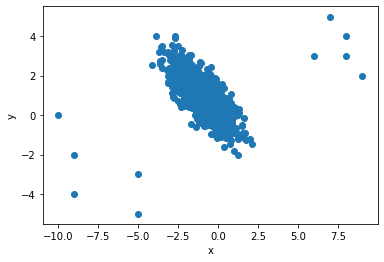

In [6]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# Add singular bias feature
X = np.array([np.array([1,val]) for val in x])
X[:5], y[:5]

(array([[ 1.        , -2.50864293],
        [ 1.        , -1.12325016],
        [ 1.        , -3.09246045],
        [ 1.        , -1.94223919],
        [ 1.        , -0.75827911]]),
 array([2.79159681, 2.70780094, 2.40142063, 1.83521348, 1.0486161 ]))

In [8]:
X.shape, y.shape

((1010, 2), (1010,))

### Define model

Prediction function $y = \theta^Tx$:

In [9]:
def predict(X, theta):
    return np.dot(X,theta)

Cost function as normalized sum of errors on the dataset: $J(\theta) = \frac{1}{2n} \sum\limits_{i=1}^n(y-h_\theta(X))^2$

In [10]:
def computeCost(X, y, theta):
    return sum((y-predict(X, theta))**2) / (2*len(X))

Let's visualize cost function surface in 3d space. For this compute cost function value for a grid-shaped set of theta:

In [11]:
size = 100 # amount of tries for each parameter
limits = (-10,10) # range of values for each parameter
error = np.zeros((size,size)) # empty matrix of errors
for i,w in enumerate(np.linspace(*limits,size)): # for each theta[0] component
    for j,b in enumerate(np.linspace(*limits,size)): # for each theate[1] component
        error[i,j] = computeCost(X, y, np.array([w,b])) # compute cost for each theta

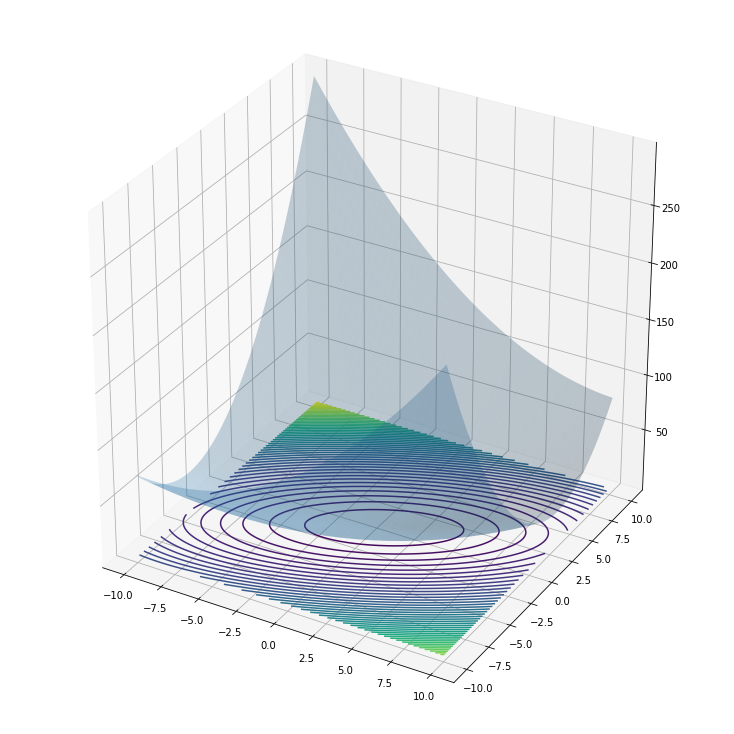

In [12]:
# initialize figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)

# create 2d array for each index 
L,K = np.meshgrid(np.linspace(*limits,size),np.linspace(*limits,size))

ax.plot_surface(K,L,Z = error, alpha = 0.25) # plot cost function surface in 3d
plt.contour(K,L,error,50, offset = 0) # plot cost function 2d-projection

## Learn model

Define learning algorithm

Simple gradient descent algorithm: 

$\theta = \theta + \alpha \nabla J(\theta)$

$\nabla J(\theta) = \sum_m(y - h_\theta(X))X$

In [13]:
def gradientDescent(X, y, init = 1, alpha = 0.001, iters = 100):
    #     theta = np.array([1,1]) * init # init theta with any scalar or vector
    theta = np.ones_like(X[0]) * init # init theta with any scalar or vector
    m = len(X)
    history = [] # list of theta values on each iteration 
    cost = [] # list of cost function values on each iteration
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        theta = theta + alpha * (np.sum((y - np.dot(X, theta.T)) * X.T, axis = 1))
        
    return theta, np.array(cost), np.array(history)

Initialize learning

In [29]:
alpha = 0.0001
iters = 1000

Learn model

In [30]:
gd_alpha = alpha
gd_iters = iters
gd_weights = w
gd_batch_size = len(X)
w, cost, history = gradientDescent(X, y,
                                 alpha = gd_alpha,
                                 iters = gd_iters,
                                 init = [5, 10])# initialize with far point for better visualization

In [31]:
gd_cost = computeCost(X, y, w)
print('Model`s cost:', computeCost(X, y, w))
print('Calculated weights: ', w)

Model`s cost: 0.44900520621276674
Calculated weights:  [ 0.66312429 -0.31470744]


### Check (0,0) solution:

In [32]:
ww = [0,0]
print("Model's cost: ", computeCost(X, y, ww))

Model's cost:  0.9961945927261747


### Visualize model

[-10.   9.]


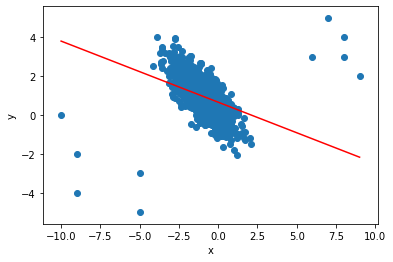

In [33]:
extremes = np.array([np.min(x), np.max(x)])
line = w[0] + extremes * w[1]
print(extremes)
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Visualize learning process

Cost function:

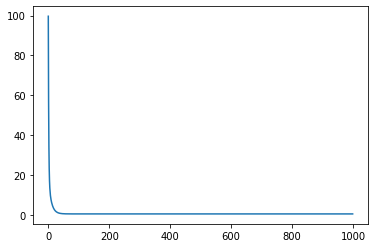

In [34]:
plt.plot(cost)

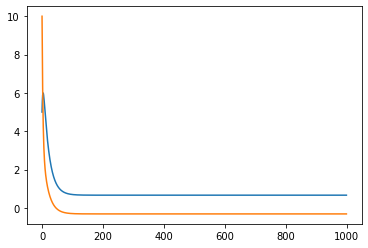

In [35]:
plt.plot(history)

Model's trajectory in parameter's space

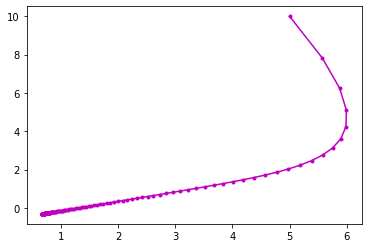

In [36]:
# plt.coutour(K, L, error, 50)
plt.plot(history[:,0], history[:,1], 'm.-')

Model's trajectory on cost function surface:

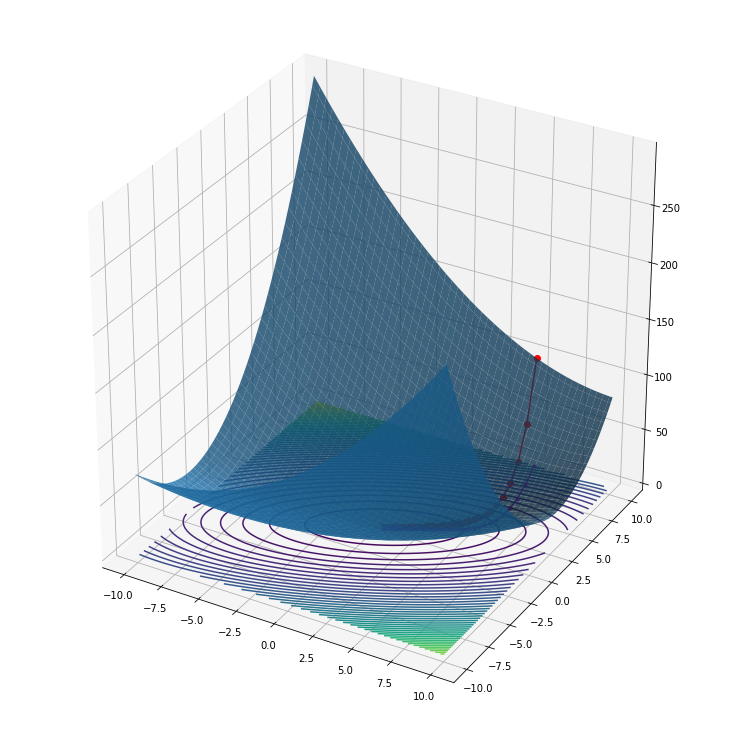

In [37]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.plot_surface(K,L,Z = error, alpha = 0.8)
ax.plot3D(history[:,0], history[:,1], cost, 'ro-')
plt.contour(K,L,error,50, offset = 0)
plt.plot(history[:,0], history[:,1],'m.-')

Add stochastic mode for gradient descent:

In [38]:
def StochasticGD(X, y, alpha, iters, batch_size, init = 1):
    theta = np.ones_like(X[0]) * init
    # vars for visualization purpuses
    cost = []
    history = []
    data = [] # for batches 
    
    for i in range(iters):
        history.append(theta)
        cost.append(computeCost(X, y, theta))
        
        idx = np.random.choice(len(X), replace=False, size=batch_size) # choose random batch from dataset
        data.append((X[idx][:,1], y[idx]))
        theta, _, _ = gradientDescent(X[idx], y[idx],
                                     alpha = alpha,
                                     iters = 1,
                                     init = theta)
    return theta, np.array(cost), np.array(history), np.array(data)

In [67]:
sgd_iters = 4000
sgd_alpha = 0.0001
sgd_batch_size = 30
w, cost, history, data = StochasticGD(X, y,
                                     alpha = sgd_alpha,
                                     iters = sgd_iters,
                                     batch_size = sgd_batch_size,
                                     init = [5,10])

In [68]:
sgd_cost = computeCost(X, y, w)
sgd_weights = w
print("Model's cost: ", computeCost(X, y, w))
print("Calculated weights: ", w)

Model's cost:  0.4492104933399735
Calculated weights:  [ 0.68029939 -0.29852437]


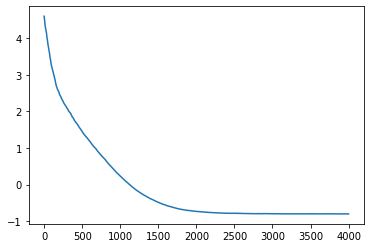

In [69]:
plt.plot(np.log(cost)) 

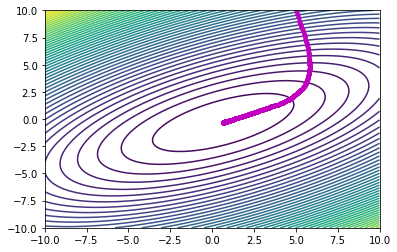

In [70]:
plt.contour(K,L,error,50)
plt.plot(history[:,0], history[:,1],'m.-')

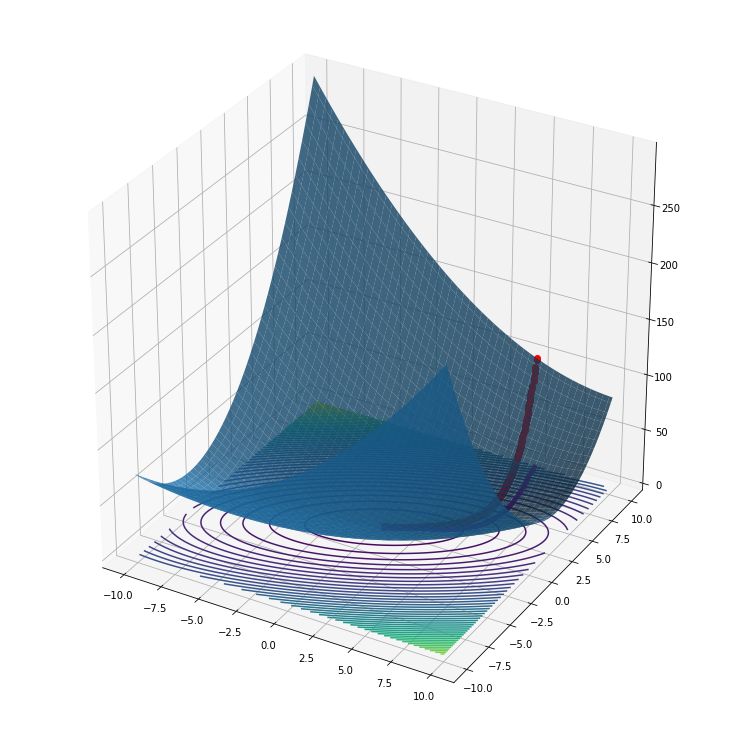

In [71]:
fig = plt.figure(figsize = (10,10))
ax = Axes3D(fig)
ax.plot_surface(K,L,Z = error, alpha = 0.8)
ax.plot3D(history[:,0], history[:,1], cost, 'ro-')
plt.contour(K,L,error,50, offset = 0)
plt.plot(history[:,0], history[:,1],'m.-')

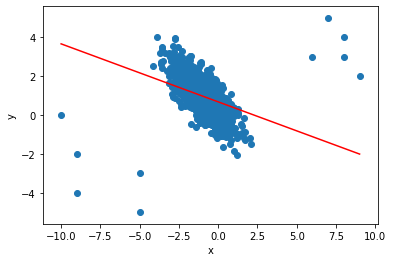

In [72]:
extremes = np.array([np.min(x), np.max(x)])
line =  w[0] + extremes * w[1]
plt.plot(extremes, line, 'r-')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Let`s compare GD and SGD for our data

In [73]:
import pandas as pd

models = {'Cost_func_val': [gd_cost, sgd_cost],
        'Iters_count': [gd_iters, sgd_iters],
        'Alpha': [gd_alpha, sgd_alpha],
        'Batch_size': [gd_batch_size, sgd_batch_size],
         'Weights': [gd_weights, sgd_weights]}

df = pd.DataFrame(models, columns = ['Cost_func_val','Iters_count', 'Alpha','Batch_size', 'Weights'], index=['GD','SGD'])
print(df)

     Cost_func_val  Iters_count   Alpha  Batch_size  \
GD        0.449005         1000  0.0001        1010   
SGD       0.449210         4000  0.0001          30   

                                        Weights  
GD   [0.6631242876250308, -0.31470744003315154]  
SGD   [0.6802993876270835, -0.2985243733379028]  


# Conclusions
If data contains abnormal data in `not big` range we can try to choose count of iterations and step of GD and try to find min value of cost func

GD trying to understand emissions as the result we have bad general predictions that was better with clean normal distribution.

For escaping that - before modeling we need clean data from abnormal data(and normalize in real life, because when we have more than one feature thay can be it different range)

If data contains abnormal data in `big` - range:
- GD demands less alpha(look at HW-1-with-abnormal-data-0) 

- SGD demands less bathes 

SGD still demands less computation capacity. Even if we need more iters, we use less data for learning.